# Mass

[8.78282093e-03 5.66391338e-03 4.47892945e-03 5.67330997e-03
 2.82338364e-03 2.99975299e-03 1.80767118e-03 6.84152139e-04
 3.18267169e-05 7.31728067e-06]
[1.48912063e-03 6.74100346e-03 1.65582795e-03 4.39551466e-03
 1.16413661e-03 4.72288634e-04 2.69582685e-03 2.61050311e-03
 6.50235465e-04 7.45758360e-05]
[       nan        nan 0.07097309 0.02098003 0.00561937 0.02209814
 0.01378407 0.01476229 0.00652106 0.0085799 ]


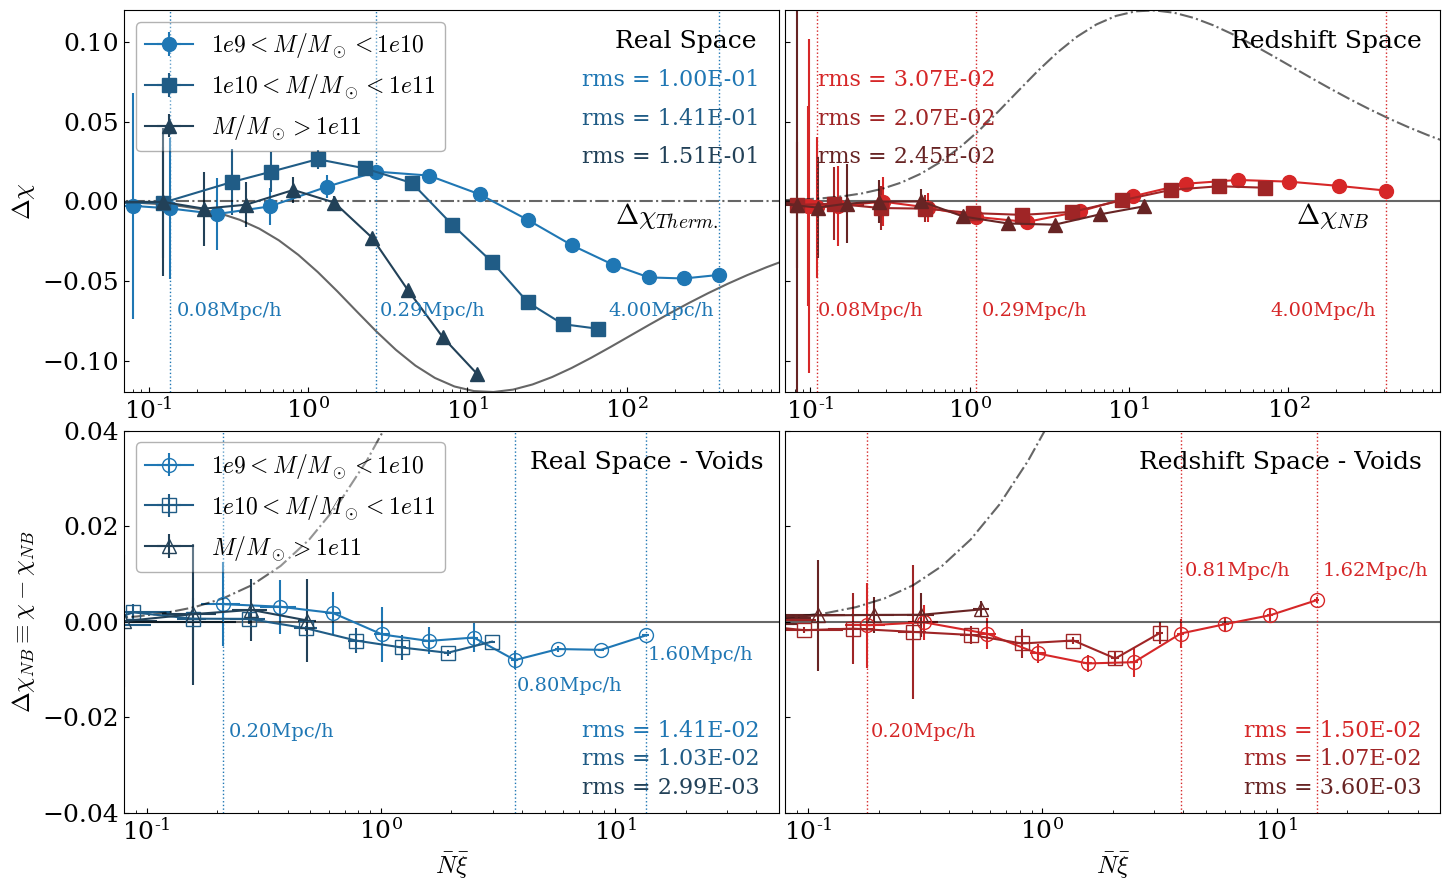

In [45]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns

fs = 18
ms = 10

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x

fig, axs = plt.subplots(2, 2, figsize=(15, 9), sharex=False)
ax=axs[0,0]
ax1=axs[0,1]
ax2=axs[1,0]
ax3=axs[1,1]


xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)
#ax.plot(x,np.log(1+x)/x,label='NB',c='k',alpha=0.6)
#ax.plot(x,(np.sqrt(1+2*x)-1)/x,label='Therm.',c='k',ls='-.',alpha=0.6)
ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_T(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_T(x),c='k',ls='-.',alpha=0.6)
ax2.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax2.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax3.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax3.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
# a=.2
# ax.plot(x,(1/((1-a)*(x/a)))*((1+x/a)**(1-a)-1),label='GH',c='k',ls='--',alpha=0.6)
# Q=1.2
# ax.plot(x,1-(np.euler_gamma+np.log(4*Q*x))/(8*Q),label='BBGKY',c='k',ls=':',alpha=0.6)


#---------------------------------------------------------------------------------------------
#------------BOX-------------------------------------------------------------
#---------------------------------------------------------------------------------------------
"""
REAL SPACE
"""
files = ['../data/allgxs_nesf100000_jk_maxMass1e10.npz',\
         '../data/allgxs_nesf100000_jk_minMass1e10_maxMass1e11.npz',\
         '../data/allgxs_nesf100000_jk_minMass1e11.npz']#,\
         #'../data/allgxs_nesf100000_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = [r'$1e9<M/M_\odot<1e10$', r'$1e10<M/M_\odot<1e11$',r'$M/M_\odot > 1e11$']#,'Mass > 1e12']
ypos_rmss = [.8,.7,.6]
colors = sns.dark_palette(sns.color_palette("tab10")[0], 4, reverse=True)[:3]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,1E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.08,.39,.74],[.2,.2,.2]):
            vline=ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            #ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_T(NXi),xerr=NXierr,yerr=chierr,marker=marker,label=label,color=color,ms=ms)

    # RMS
    mask = np.where(NXi>1E-1)
    rms = np.sqrt(np.sum((chi[mask]-chi_T(NXi[mask]))**2))
    ax.text(.7,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax.transAxes)


"""
REDSHIFT SPACE
"""
files = ['../data/allgxs_nesf100000_redshiftz_jk_maxMass1e10.npz',\
         '../data/allgxs_nesf100000_redshiftz_jk_minMass1e10_maxMass1e11.npz',\
         '../data/allgxs_nesf100000_redshiftz_jk_minMass1e11.npz']#,\
         #'../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = ['Mass > 1E09', 'Mass > 1E10','Mass > 1E11']#,'Mass > 1e12']
ypos_rmss = [.8,.7,.6] 
colors = sns.dark_palette(sns.color_palette("tab10")[3], 4, reverse=True)[:3]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):
    #print(file)
    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,1E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.05,.3,.74],[.2,.2,.2]):
            vline=ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            #ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax1.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax1.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,label=label,color=color,ms=ms)

    # RMS
    mask = np.where(NXi>1E-1)
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax1.text(.05,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax1.transAxes)
#---------------------------------------------------------------------------------------------
#------------BOX-------------------------------------------------------------
#---------------------------------------------------------------------------------------------



#---------------------------------------------------------------------------------------------
#------------VOIDS-------------------------------------------------------------
#---------------------------------------------------------------------------------------------

"""
REAL SPACE
"""
nesf=20000
files = [f'../data/allgxs_nesf{nesf}_invoid_jk_maxMass1e10_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_invoid_jk_minMass1e10_maxMass1e11_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_invoid_jk_minMass1e11_v1e11_minradV9.0.npz']#,\
         #'../data/allgxs_nesf100000_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = [r'$1e9<M/M_\odot<1e10$', r'$1e10<M/M_\odot<1e11$',r'$M/M_\odot > 1e11$']#,'Mass > 1e12']
ypos_rmss = np.flip(np.linspace(.05,.05+.05*len(files),len(files)))
colors = sns.dark_palette(sns.color_palette("tab10")[0], 4, reverse=True)[:3]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,nesf)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.16,.6,.8],[.2,.32,.4]):
            vline=ax2.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            #ax2.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax2.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax2.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax2.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label,color=color,ms=ms)
    print(chierr)

    # RMS
    mask = np.where(NXi>1E-1)
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax2.text(.7,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax2.transAxes)


"""
REDSHIFT SPACE
"""
files = [f'../data/allgxs_nesf{nesf}_redshiftz_invoid_jk_maxMass1e10_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_redshiftz_invoid_jk_minMass1e10_maxMass1e11_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_redshiftz_invoid_jk_minMass1e11_v1e11_minradV9.0.npz']#,\
         #'../data/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
#labels = ['Mass > 1E09', 'Mass > 1E10','Mass > 1E11']#,'Mass > 1e12']
ypos_rmss = np.flip(np.linspace(.05,.05+.05*len(files),len(files)))
colors = sns.dark_palette(sns.color_palette("tab10")[3], 4, reverse=True)[:3]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,nesf)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.13,.61,.82],[.2,.62,.62]):
            vline = ax3.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            #ax3.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax3.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax3.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax3.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label,color=color,ms=ms)

    # RMS
    mask = np.where(NXi>1E-1)
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax3.text(.7,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax3.transAxes)
    

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
# Log Scale
ax1.set_xscale('log')
ax.set_xscale('log')
ax3.set_xscale('log')
ax2.set_xscale('log')

# Y Labels
ax.set_ylabel(r'$\Delta\chi$',fontsize=fs)
ax2.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

ax3.set_yticklabels([])

# Set Y axis to right side
#ax1.yaxis.set_label_position("right")
#ax1.yaxis.tick_right()

# X Labels
ax2.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ax3.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Y axis limis
ylim1,ylim2 = -.12,.12
ax.set_ylim([ylim1,ylim2])
ax1.set_ylim([ylim1,ylim2])
ax1.set_yticklabels([])

ylim3,ylim4 = -.04,.04
ax2.set_ylim([ylim3,ylim4])
ax3.set_ylim([ylim3,ylim4])


# X axis limits
xlim1,xlim2=7E-2,9E2
ax.set_xlim(xlim1,xlim2)
ax1.set_xlim(xlim1,xlim2)

xlim3,xlim4=8E-2,5E1
ax2.set_xlim(xlim3,xlim4)
ax3.set_xlim(xlim3,xlim4)

# Legend
ax.legend(loc=2,fontsize=fs-1,ncol=1,frameon=True,framealpha=.3,edgecolor='k')
ax2.legend(loc=2,fontsize=fs-1,ncol=1,frameon=True,framealpha=.3,edgecolor='k')

# Ticks
#ax.set_xticklabels([])
#ax1.set_yticklabels([])
ax.tick_params(labelsize=fs)
ax1.tick_params(labelsize=fs)

# Additional text
ax.text(.75,.9,'Real Space',fontsize=fs,transform=ax.transAxes)
ax1.text(.68,.9,'Redshift Space',fontsize=fs,transform=ax1.transAxes)

ax.text(.75,.44,r'$\Delta\chi_{Therm.}$',fontsize=fs+2,transform=ax.transAxes)
ax1.text(.78,.44,r'$\Delta\chi_{NB}$',fontsize=fs+2,transform=ax1.transAxes)

ax2.text(.62,.9,'Real Space - Voids',fontsize=fs,transform=ax2.transAxes)
ax3.text(.54,.9,'Redshift Space - Voids',fontsize=fs,transform=ax3.transAxes)

# Final
#plt.suptitle('RVPF dependency on galaxy mass',fontsize=fs)
plt.tight_layout()
plt.subplots_adjust(hspace=.1,wspace=0.01)
#plt.subplots_adjust(wspace=0.19)

plt.savefig('../plots/rVPF_gxsMass_master.pdf')
#plt.savefig('../plots/rVPF_gxsMass.png')
plt.show()

# Redshift

/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF/codes/cicTools.py:571: RuntimeWarning: divide by zero encountered in log
  return chi*abs(P0err/(P0*abs(np.log(P0)))-N_mean_std/N_mean)
/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF/codes/cicTools.py:571: RuntimeWarning: invalid value encountered in multiply
  return chi*abs(P0err/(P0*abs(np.log(P0)))-N_mean_std/N_mean)


../data/allgxs_nesf100000_redshiftz_jk.npz
../data/allgxs_nesf100000_redshiftz_jk_snap67.npz
../data/allgxs_nesf100000_redshiftz_jk_snap50.npz
../data/allgxs_nesf100000_redshiftz_jk_snap33.npz


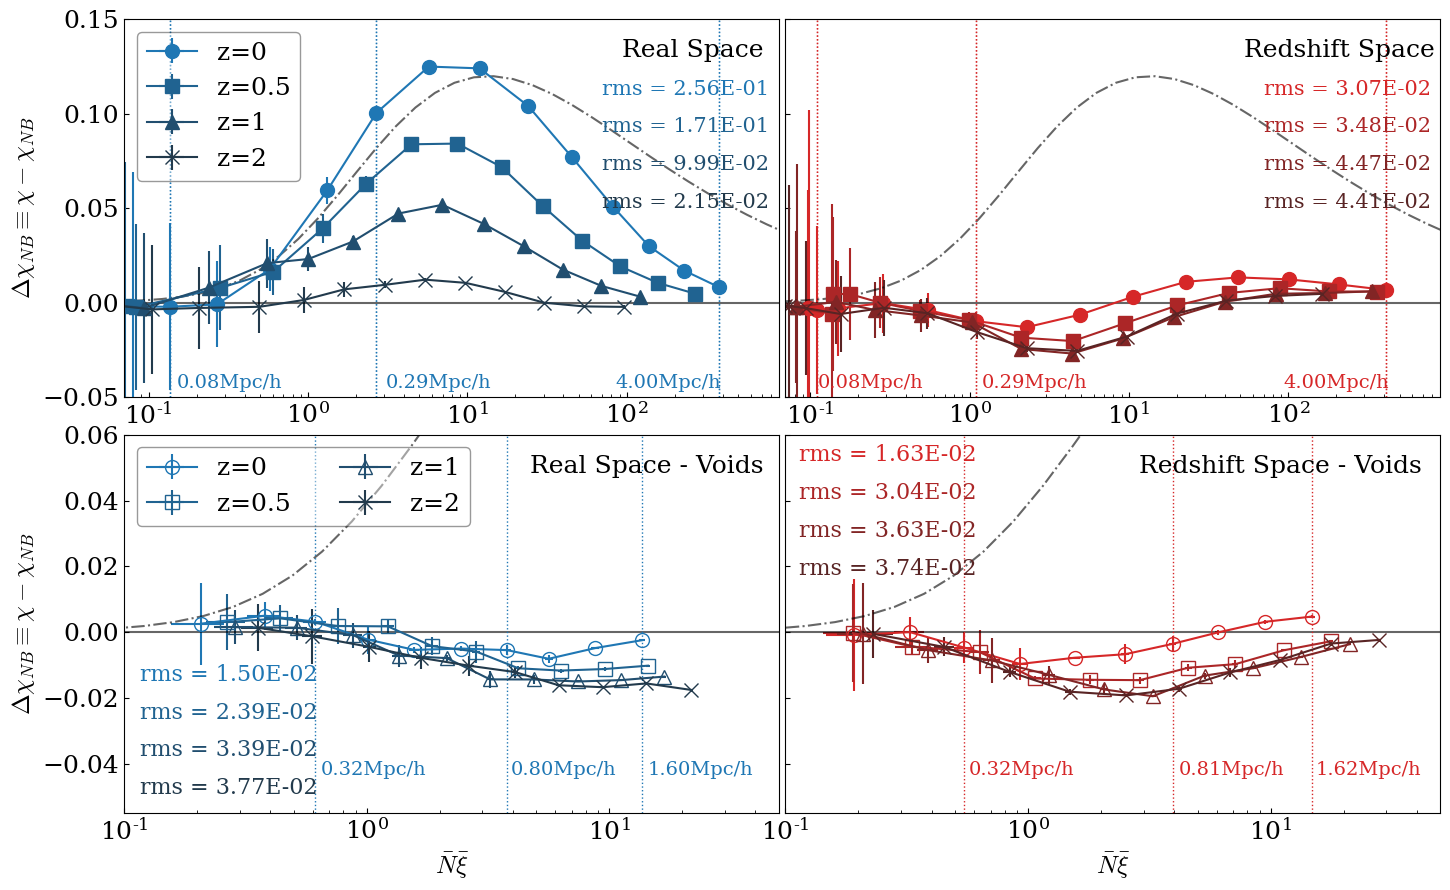

In [48]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns

fs = 18
ms = 10

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
def chi_GH(x,a):
    return ((1+x/a)**(1-a)-1)*a/((1-a)*x)

fig, axs = plt.subplots(2, 2, figsize=(15, 9), sharex=False)
ax=axs[0,0]
ax1=axs[0,1]
ax2=axs[1,0]
ax3=axs[1,1]

xmin, xmax = 1E-3, 1E3 
x = np.geomspace(xmin,xmax,50)
#ax.plot(x,chi_GH(x,.55)-chi_NB(x),c='k',ls=':',alpha=0.6)
#ax1.plot(x,chi_GH(x,1.5)-chi_NB(x),c='k',ls=':',alpha=0.6)
ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax2.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax2.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax3.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax3.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

# a=.2
# ax.plot(x,(1/((1-a)*(x/a)))*((1+x/a)**(1-a)-1),label='GH',c='k',ls='--',alpha=0.6)
# Q=1.2
# ax.plot(x,1-(np.euler_gamma+np.log(4*Q*x))/(8*Q),label='BBGKY',c='k',ls=':',alpha=0.6)


#---------------------------------------------------------------------------------------------
#-----------BOX----------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Hardcoded values of z for snaps (tng-project.org/data/docs/specifications/)
n_snap = [2,3,4,6,8,11,13,17,21,\
          25,28,33,40,50,59,67,72,78,84,91,99]
redshift = ['z=12','z=11','z=10','z=9','z=8','z=7','z=6','z=5','z=4',\
            'z=3','z=2.58','z=2','z=1.5','z=1','z=0.7','z=0.5','z=0.4','z=0.3','z=0.2','z=0.1','z=0']
dict_snap_to_z=dict(zip(n_snap,redshift))

"""
REAL SPACE
"""

snaps=[99,67,50,33] #Snaps I want to plot
files = ['../data/allgxs_nesf100000_jk.npz']
for snap in snaps:
    if snap==99: continue
    files.append(f'../data/allgxs_nesf100000_jk_snap{snap}.npz')
    # elif snap!=25:
    #     files.append(f'../data/allgxs_nesf100000_jk_snap{snap}.npz')
    # elif snap==25:
    #     files.append(f'../data/allgxs_nesf100000_jk_snap25_minMass1e8.npz')


markers = ['o','s','^','x','<','>','v','*','D','P','1','2','3'][:len(files)]
labels = [dict_snap_to_z[snap] for snap in snaps]
ypos_rmss = [.8,.7,.6,.5,.4,.3,.2,.1,0][:len(files)]
colors = sns.dark_palette(sns.color_palette("tab10")[0], len(files)+1, reverse=True)[:len(files)]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,1E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.08,.4,.75],[.025,.025,.025]):
            vline=ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,color=color,label=label,ms=ms)

    # RMS
    #print(chi)
    mask = np.where(NXi>1E-1)
    #print(chi[mask])
    chirms = chi[mask]
    NXirms = NXi[mask]
    mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chirms[mask]-chi_NB(NXirms[mask]))**2))
    ax.text(.73,ypos_rms,f'rms = {rms:.2E}',size=fs-3,color=ebar[0].get_color(),transform=ax.transAxes)


"""
REDSHIFT SPACE
"""

files = ['../data/allgxs_nesf100000_redshiftz_jk.npz']
for snap in snaps:
    if snap==99: continue
    files.append(f'../data/allgxs_nesf100000_redshiftz_jk_snap{snap}.npz')
    # elif snap!=25:
    #     files.append(f'../data/allgxs_nesf100000_redshiftz_jk_snap{snap}.npz')
    # elif snap==25:
    #     files.append(f'../data/allgxs_nesf100000_redshiftz_jk_snap25_minMass1e8.npz')
markers = ['o','s','^','x','<','>','v','*','D','P','1','2','3'][:len(files)]
labels = [dict_snap_to_z[snap] for snap in snaps]
ypos_rmss = [.8,.7,.6,.5,.4,.3,.2,.1,0][:len(files)]
colors = sns.dark_palette(sns.color_palette("tab10")[3], len(files)+1, reverse=True)[:len(files)]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):
    print(file)
    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,1E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.05,.3,.76],[.025,.025,.025]):
            vline=ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax1.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax1.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,color=color,label=label,ms=ms)

    # RMS
    #print(chi)
    mask = np.where(NXi>1E-1)
    #print(chi[mask])
    chirms = chi[mask]
    NXirms = NXi[mask]
    mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chirms[mask]-chi_NB(NXirms[mask]))**2))
    ax1.text(.73,ypos_rms,f'rms = {rms:.2E}',size=fs-3,color=ebar[0].get_color(),transform=ax1.transAxes)
#---------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------
#-----------VOIDS----------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
"""
REAL SPACE
"""
nesf=20000
files = [f'../data/allgxs_nesf{nesf}_invoid_jk_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_invoid_jk_snap67_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_invoid_jk_snap50_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_invoid_jk_snap33_v1e11_minradV9.0.npz']
markers = ['o','s','^','x']
labels = ['z=0', 'z=0.5','z=1', 'z=2']
ypos_rmss = [.35,.25,.15,.05]
colors = sns.dark_palette(sns.color_palette("tab10")[0], 5, reverse=True)[:4]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,nesf)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.3,.59,.8],[.1,.1,.1]):
            vline=ax2.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax2.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax2.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax2.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label,color=color,ms=ms)

    # RMS
    mask = np.where(NXi>1E-1)
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax2.text(.025,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax2.transAxes)


"""
REDSHIFT SPACE
"""
files = [f'../data/allgxs_nesf{nesf}_redshiftz_invoid_jk_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_redshiftz_invoid_jk_snap67_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_redshiftz_invoid_jk_snap50_v1e11_minradV9.0.npz',\
         f'../data/allgxs_nesf{nesf}_redshiftz_invoid_jk_snap33_v1e11_minradV9.0.npz']
markers = ['o','s','^','x']
labels = ['z=0', 'z=0.5','z=1', 'z=2']
ypos_rmss = [.93,.83,.73,.63] 
colors = sns.dark_palette(sns.color_palette("tab10")[3], 5, reverse=True)[:4]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):
    #print(file)
    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,nesf)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([2,6,-1],[.28,.6,.81],[.1,.1,.1]):
            vline=ax3.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax3.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax3.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax3.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label,color=color,ms=ms)

    # RMS
    #print(chi)
    mask = np.where(NXi>1E-1)
    #print(chi[mask])
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax3.text(.02,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax3.transAxes)
    

#---------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------


# Log Scale
ax1.set_xscale('log')
ax.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

# Y Labels
ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)
ax2.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

# Set Y axis to right side
# ax1.yaxis.set_label_position("right")
# ax1.yaxis.tick_right()

# X Labels
ax2.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ax3.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Y axis limis
ylim1,ylim2 = -.05,.15
ax.set_ylim([ylim1,ylim2])
ax1.set_ylim([ylim1,ylim2])
ylim3,ylim4 = -.055,.06
ax3.set_ylim([ylim3,ylim4])
ax2.set_ylim([ylim3,ylim4])

# X axis limits
xlim1,xlim2=7E-2,9E2
ax.set_xlim(xlim1,xlim2)
ax1.set_xlim(xlim1,xlim2)

xlim3,xlim4=1E-1,5E1
ax2.set_xlim(xlim3,xlim4)
ax3.set_xlim(xlim3,xlim4)


# Legend
ax.legend(loc=2,fontsize=fs,ncol=1,frameon=True,edgecolor='k',framealpha=.4)
ax2.legend(loc=2,fontsize=fs,ncol=2,frameon=True,edgecolor='k',framealpha=.4)

# Ticks
ax3.set_yticklabels([])
ax1.set_yticklabels([])
ax.tick_params(labelsize=fs)
ax1.tick_params(labelsize=fs)

# Additional text
ax.text(.76,.9,'Real Space',fontsize=fs,transform=ax.transAxes)
ax1.text(.7,.9,'Redshift Space',fontsize=fs,transform=ax1.transAxes)

ax2.text(.62,.9,'Real Space - Voids',fontsize=fs,transform=ax2.transAxes)
ax3.text(.54,.9,'Redshift Space - Voids',fontsize=fs,transform=ax3.transAxes)


# Final
#plt.suptitle('RVPF dependency on redshift',fontsize=fs)
plt.tight_layout()
#plt.subplots_adjust(hspace=0,wspace=0.03)
plt.subplots_adjust(hspace=.1,wspace=0.01)

#plt.savefig('../plots/rVPF_redshift_master.pdf')
#plt.savefig('../plots/rVPF_redshift.png')
plt.show()

# Dilutions

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from cicTools import *
def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
fs = 18
ms = 8

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

fig, axs = plt.subplots(4, 2, figsize=(15, 12), sharex=True, \
    gridspec_kw={'height_ratios': [3, 1, 3, 1]})
ms = 10
# ax = axs[0,0]
# ax1 = axs[1,0]
# ax2 = axs[1,0]
# ax3 = axs[1,0]
# ax4 = axs[1,0]
# ax5 = axs[1,0]


for ax,ax1,color,text,file in zip((axs[0,0],axs[0,1]),(axs[1,0],axs[1,1]),\
    ['C00','C03'],['Real Space','Redshift Space'],\
        ['../data/allgxs_nesf100000_jk.npz','../data/allgxs_nesf100000_redshiftz_jk.npz']):
    
    # chi vs Nxi
    xmin, xmax = 1E-2, 1E3 
    x = np.geomspace(xmin,xmax,50)
    ax.plot(x,np.log(1+x)/x,label='NB',c='k',alpha=0.6)
    ax.plot(x,(np.sqrt(1+2*x)-1)/x,label='Therm.',c='k',ls='-.',alpha=0.6)

    if text=='Real Space':
        ax1.plot(x,chi_NB(x)-chi_T(x),c='k',alpha=0.6)
        ax1.plot(x,chi_T(x)-chi_T(x),c='k',ls='-.',alpha=0.6)
    if text=='Redshift Space':
        ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
        ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

    stats = np.load(file)
    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot chi(NXi)
    ebar=ax.errorbar(NXi,chi,xerr=NXierr,yerr=chierr,marker='o',label=r'$N_{tot}$',color=color,markersize=ms)
    
    # Delta plot and RMS calculation
    xpos = .025
    ypos = .8
    if text=='Real Space': 
        ax1.errorbar(NXi,chi-chi_T(NXi),xerr=NXierr,yerr=chierr,marker='o',color=color,markersize=ms)

        rms = np.sqrt(np.sum((chi-chi_T(NXi))**2))
        ax1.text(xpos,ypos,f'rms = {rms:.2E}',size=fs-1,transform=ax1.transAxes,color=color)

    if text=='Redshift Space': 
        ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker='o',color=color,markersize=ms)

        rms = np.sqrt(np.sum((chi-chi_NB(NXi))**2))
        ax1.text(xpos,ypos,f'rms = {rms:.2E}',size=fs-1,transform=ax1.transAxes,color=color)

    # Plot lineas verticales con escalas
    lw = 1
    ls = ':'
    for ind,xpos,ypos in zip([1,6,-1],[1.1E-2,1.3,.8E2],[.85,.75,.15]):
        vline=ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
        ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
        ax.text(xpos,ypos,f'{rs[ind]/1000.:.2f}Mpc/h',\
                 color=color,size=fs-1.5)
        
    # Plot Diluciones
    for ngxs,m,a,xpos in zip(['0.5','0.25','0.1'],['s','^','x'],[.8,.9,1],\
                             [.05,.37,.68]):

        if text=='Redshift Space': 
            modifier='redshiftz_'
        else:
            modifier=''

        file = f'../data/dilut{ngxs}_nesf100000_{modifier}jk.npz'
        stats = np.load(file)
        chi = stats['arr_0']
        chi_std = stats['arr_1']
        NXi = stats['arr_2']
        NXi_std = stats['arr_3']
        P0 = stats['arr_4']
        P0_std = stats['arr_5']
        N_mean = stats['arr_6']
        N_mean_std = stats['arr_7']
        xi_mean = stats['arr_8']
        xi_mean_std = stats['arr_9']
        rs = stats['arr_10']

        P0err=delta_P0(P0,10E5)
        NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
        chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

        ax.errorbar(NXi,chi,xerr=NXierr,yerr=chierr,\
            fmt=m,alpha=a,color='k',label=r'$N/N_{tot}=$'+ngxs,markersize=ms)
        
        # Delta plot and RMS calculations
        ypos = .05
        if text=='Real Space': 
            ax1.errorbar(NXi,chi-chi_T(NXi),xerr=NXierr,yerr=chierr,\
            fmt=m,alpha=a,color='k',markersize=ms)
            rms = np.sqrt(np.sum((chi-chi_T(NXi))**2))

            if ngxs=='0.5': text1 = r'$\mathregular{rms}_\blacksquare = $'
            if ngxs=='0.25': text1 = r'$\mathregular{rms}_\blacktriangle = $'
            if ngxs=='0.1': text1 = r'$\mathregular{rms}_\times = $'
            text2 = f'{rms:.2E}'
            if ngxs!='0.1':text2 = f'{rms:.2E};'
            ax1.text(xpos,ypos,text1+text2,size=fs-2.5,transform=ax1.transAxes)
        
        if text=='Redshift Space': 
            ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,\
            fmt=m,alpha=a,color='k',markersize=ms)

            rms = np.sqrt(np.sum((chi-chi_NB(NXi))**2))
            if ngxs=='0.5': text1 = r'$\mathregular{rms}_\blacksquare = $'
            if ngxs=='0.25': text1 = r'$\mathregular{rms}_\blacktriangle = $'
            if ngxs=='0.1': text1 = r'$\mathregular{rms}_\times = $'
            text2 = f'{rms:.2E}'
            if ngxs!='0.1':text2 = f'{rms:.2E};'
            ax1.text(xpos,ypos,text1+text2,size=fs-2.5,transform=ax1.transAxes)

    if text=='Redshift Space':
        ax.text(.6,.9,text, transform=ax.transAxes,fontsize=fs)
    else: 
        ax.text(.65,.9,text, transform=ax.transAxes,fontsize=fs)


    ax.legend(loc=3,fontsize=fs)#,edgecolor='none',framealpha=0)
    ax.set_xscale('log')
    ax.set_ylabel(r'$\chi=-\mathrm{ln}(P_0)/\bar{N}$',fontsize=fs)

    ax.tick_params(axis="x",direction="in")
        
    #ax1.set_yticks([-1,-.5,0,.5,1.])
    ax1.set_xscale('log')
    ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
    if text=='Real Space': ax1.set_ylabel(r'$\Delta\chi_\mathrm{Therm.}$',fontsize=fs)
    if text=='Redshift Space': ax1.set_ylabel(r'$\Delta\chi_\mathrm{NB}$',fontsize=fs)

    ax1.set_ylim([-.125,.125])
    ax.set_ylim([-0.025,1])
    ax.set_xlim([1E-2,9E2])

ax.set_yticklabels([])


plt.tight_layout()
plt.subplots_adjust(hspace=[0.1,0,.1,0],wspace=.03)

#plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.png')
#plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.pdf')
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'list'